<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving historical_stock_prices.csv to historical_stock_prices.csv
Saving historical_stocks.csv to historical_stocks.csv


###1.Data Collection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

# Load datasets
stocks_df = pd.read_csv("historical_stocks.csv")
prices_df = pd.read_csv("historical_stock_prices.csv")

# Preview datasets
print("Stocks Dataset:")
print(stocks_df.info())
display(stocks_df.head())

print("\nPrices Dataset:")
print(prices_df.info())
display(prices_df.head())


Stocks Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB
None


,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS



Prices Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     12 non-null     object 
 1   open       12 non-null     float64
 2   close      12 non-null     float64
 3   adj_close  12 non-null     float64
 4   low        12 non-null     float64
 5   high       12 non-null     float64
 6   volume     12 non-null     int64  
 7   date       12 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 900.0+ bytes
None


,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


###2.Data Cleaning

In [6]:
# Convert 'date' to datetime and set as index
prices_df['date'] = pd.to_datetime(prices_df['date'])
prices_df.set_index('date', inplace=True)

# Fill missing sector and industry
stocks_df['sector'].fillna("Unknown", inplace=True)
stocks_df['industry'].fillna("Unknown", inplace=True)

# Remove duplicates
stocks_df.drop_duplicates(inplace=True)
prices_df.drop_duplicates(inplace=True)

# Add 'decade' column
prices_df['decade'] = (prices_df.index.year // 10 * 10).astype(str) + 's'

# Confirm changes
display(prices_df.head())
display(stocks_df.head())


/tmp/ipython-input-6-3446520638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stocks_df['sector'].fillna("Unknown", inplace=True)
/tmp/ipython-input-6-3446520638.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,ticker,open,close,adj_close,low,high,volume,decade
date,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2010s
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2010s
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2010s
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2010s
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2010s


,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


###3.Data Segmentation by Decade

In [9]:
prices_df["decade"] = (prices_df.index.year // 10 * 10).astype(str) + "s"


In [10]:
# Create a dictionary of DataFrames by decade
decade_groups = dict(tuple(prices_df.groupby("decade")))

# Show available decades
print("Decades found:", list(decade_groups.keys()))


Decades found: ['2010s']


###4.Exploratory Data Analysis by Decade

In [11]:
merged_df = prices_df.reset_index().merge(
    stocks_df,
    how="left",
    on="ticker"
)

merged_df.set_index("date", inplace=True)

# Group again after merge
merged_decade_groups = dict(tuple(merged_df.groupby("decade")))


In [12]:
summary_stats = {}

for decade, df in merged_decade_groups.items():
    stats = df[["open", "high", "low", "close", "volume"]].agg(["mean", "median", "std"])
    summary_stats[decade] = stats
    print(f"\nSummary statistics for {decade}:")
    display(stats)



Summary statistics for 2010s:


,open,high,low,close,volume
mean,11.655000,11.723333,11.545000,11.660833,5.300167e+05
median,11.635000,11.710000,11.540000,11.630000,1.588500e+05
std,0.096059,0.102809,0.115562,0.096997,1.295468e+06


/tmp/ipython-input-13-3734873280.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df["close"].resample("M").mean()


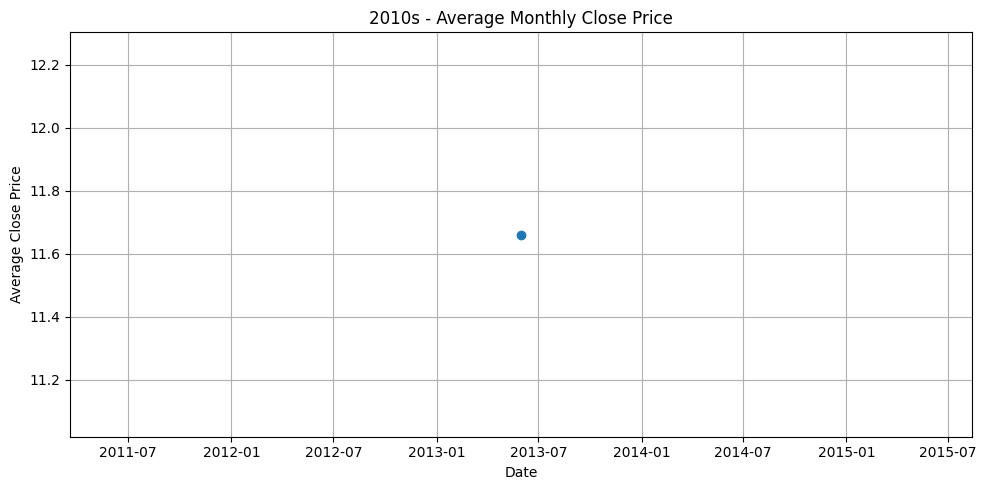

In [13]:
for decade, df in merged_decade_groups.items():
    monthly_avg = df["close"].resample("M").mean()
    plt.figure(figsize=(10,5))
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
    plt.title(f"{decade} - Average Monthly Close Price")
    plt.xlabel("Date")
    plt.ylabel("Average Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


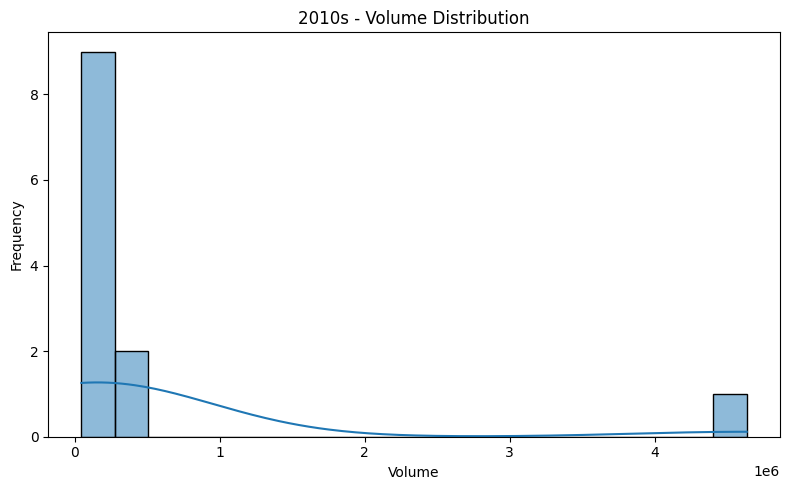

In [14]:
for decade, df in merged_decade_groups.items():
    plt.figure(figsize=(8,5))
    sns.histplot(df["volume"], bins=20, kde=True)
    plt.title(f"{decade} - Volume Distribution")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


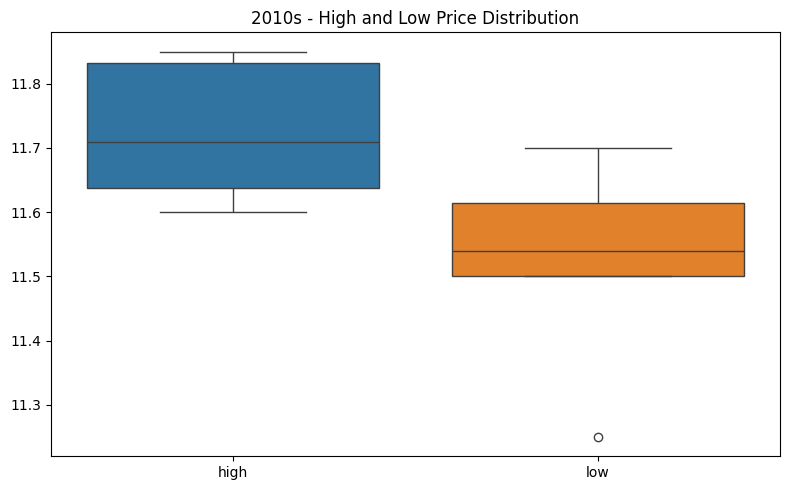

In [15]:
for decade, df in merged_decade_groups.items():
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df[["high", "low"]])
    plt.title(f"{decade} - High and Low Price Distribution")
    plt.tight_layout()
    plt.show()


###5.Comparative Analysis

In [16]:
for decade, stats in summary_stats.items():
    print(f"\n{decade} Summary:")
    print(stats)



2010s Summary:
             open       high        low      close        volume
mean    11.655000  11.723333  11.545000  11.660833  5.300167e+05
median  11.635000  11.710000  11.540000  11.630000  1.588500e+05
std      0.096059   0.102809   0.115562   0.096997  1.295468e+06
